In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Программа вычисления ДПФ гармонического сигнала
print('*** Программа вычисления ДПФ гармонического сигнала ***')
A = float(np.real(input('Введите амплитуду сигнала, ед.: ')))
f0 = float(np.real(input('Введите частоту сигнала, Гц: ')))


*** Программа вычисления ДПФ гармонического сигнала ***


ДПФ вычисляется как 

$
X(k) = X^N (\omega_k)=  \displaystyle\sum_{n=0} ^{N-1}{x_n e^{-j \frac{2 \pi}{N}nk}}, (k=0,1,...,N-1)
$

Представляем его как скалярное произведение векторов, тогда сумма не нужна:

$
\displaystyle\sum_{n=0}^{N-1}{x_n e^{-j \frac{2 \pi}{N}nk}}, (k=0,1,...,N-1)=
(x_0, ..., x_{N-1}) \cdot (c_0,...,c_{N-1}), c_n = e^{-j \frac{2 \pi}{N}nk}, (k=0,1,...,N-1)
$ 


Аналогично поступаем с обратным ДПФ.


In [ ]:
fdn = 2 * f0  # Частота дискретизации в соответствии с критерием Найквиста
mvis = 4
fdv = mvis * fdn  # Частота дискретизации для визуализации
dt = 1 / fdv  # Интервал дискретизации по времени
T = 1 / f0  # Период сигнала
NT = 6
t = np.arange(0, NT * T, dt)  # Вектор времени, с
y = A * np.sin(2 * np.pi * f0 * t)  # Вектор сигнала
N = len(y)

# Дискретное преобразование Фурье
k = np.arange(0, N)
Ex = np.exp(-1j * 2 * np.pi / N * np.outer(k, k))
Y = np.dot(y, Ex)

# Обратное дискретное преобразование Фурье
Ex = np.exp(1j * 2 * np.pi / N * np.outer(k, k))
ys = np.dot(Y / (N - 1), Ex)

Y2 = Y * np.conj(Y)  # Квадрат модуля Фурье-образа
ff = k * fdv / N  # Вектор частоты, Гц

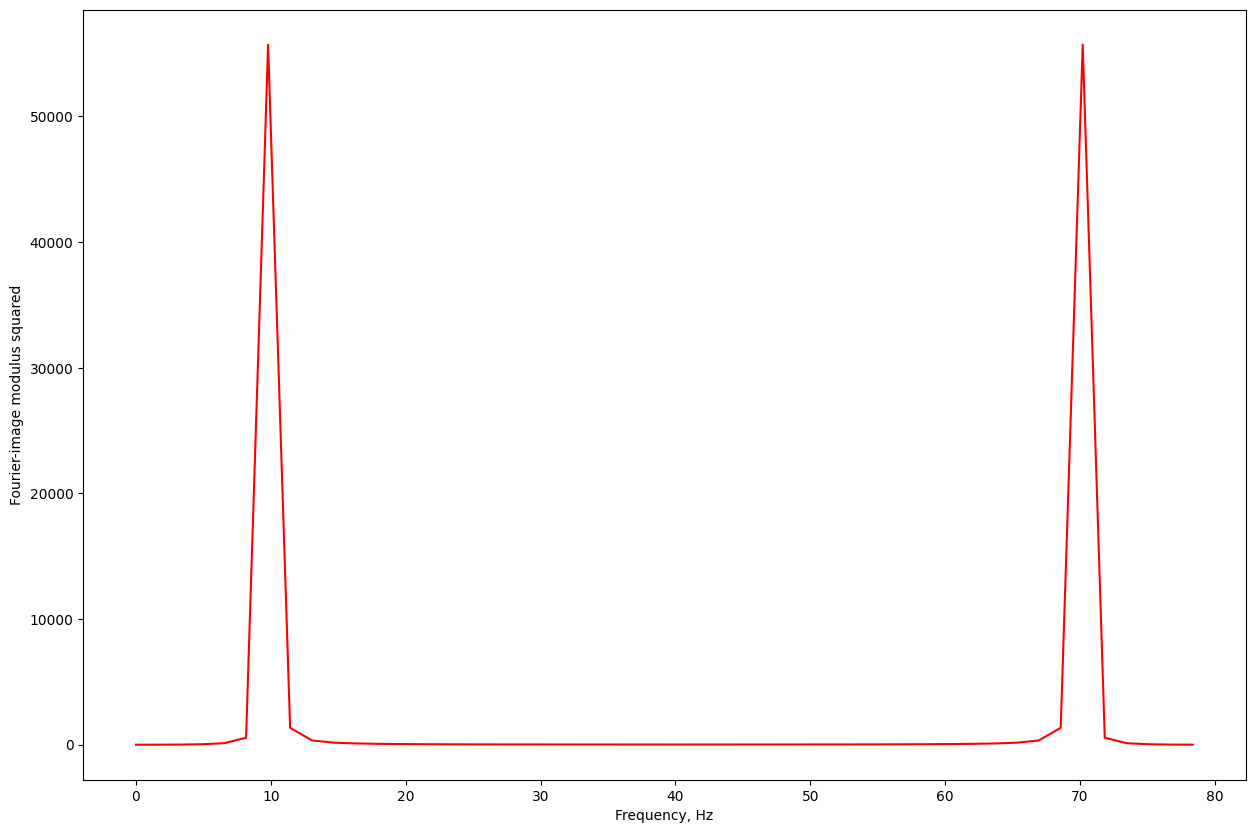

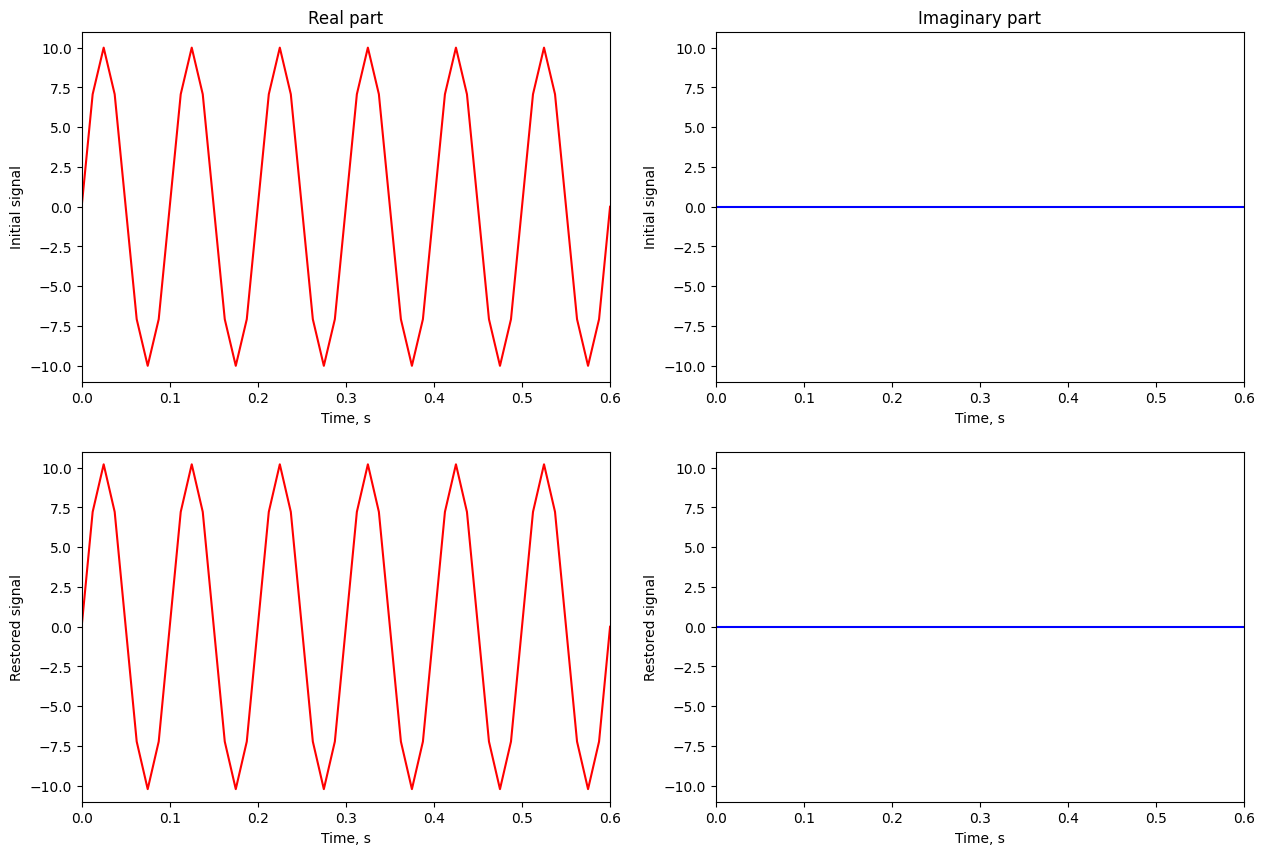

**********   Конец работы   **********


In [4]:
fig = plt.figure(figsize=(15, 10))
plt.plot(ff, Y2.real, 'r')
plt.xlabel('Frequency, Hz')
plt.ylabel('Fourier-image modulus squared')
plt.show()

fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(t, np.real(y), 'r')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.title('Real part')
plt.xlabel('Time, s')
plt.ylabel('Initial signal')

plt.subplot(2, 2, 2)
plt.plot(t, np.imag(y), 'b')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.title('Imaginary part')
plt.xlabel('Time, s')
plt.ylabel('Initial signal')

plt.subplot(2, 2, 3)
plt.plot(t, np.real(ys), 'r')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.xlabel('Time, s')
plt.ylabel('Restored signal')

plt.subplot(2, 2, 4)
plt.plot(t, np.imag(ys), 'b')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.xlabel('Time, s')
plt.ylabel('Restored signal')
plt.show()

print('**********   Конец работы   **********')